In [1]:
#
# libraries
#
import pandas as pd

In [2]:
#
# read in data
#
retail_sales = pd.read_csv('../datasets/online_retail_II.csv')
retail_sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [3]:
#
# convert InvoiceDate from str to datetime
#
retail_sales['InvoiceDate'] = pd.to_datetime(retail_sales['InvoiceDate'])

In [4]:
#
# make InvoiceDate the index
#
retail_sales.set_index('InvoiceDate', inplace = True)
retail_sales.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2011-01-04 10:00:00,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,13313.0,United Kingdom
2011-01-04 10:00:00,539993,21499,BLUE POLKADOT WRAP,25,0.42,13313.0,United Kingdom
2011-01-04 10:00:00,539993,21498,RED RETROSPOT WRAP,25,0.42,13313.0,United Kingdom
2011-01-04 10:00:00,539993,22379,RECYCLING BAG RETROSPOT,5,2.10,13313.0,United Kingdom
2011-01-04 10:00:00,539993,20718,RED RETROSPOT SHOPPER BAG,10,1.25,13313.0,United Kingdom


In [5]:
#
# compute the per-line sales as Quantity * Price
#
retail_sales['Revenue'] = retail_sales['Quantity'] * retail_sales['Price']

<AxesSubplot:xlabel='InvoiceDate'>

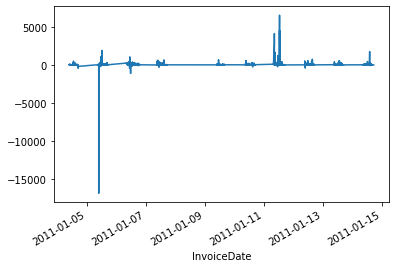

In [6]:
retail_sales.loc[retail_sales.index < pd.to_datetime('2011-01-15'),
                'Revenue'].plot()

In [7]:
#
# resample the data to 1 hour periods
# aggregate with .sum() to get total in each period
#
retail_sales = retail_sales['Revenue'].resample('1h').sum()
retail_sales

InvoiceDate
2011-01-04 10:00:00    1696.12
2011-01-04 11:00:00    1462.48
2011-01-04 12:00:00    2223.33
2011-01-04 13:00:00    5627.52
2011-01-04 14:00:00    2785.46
                        ...   
2011-06-30 16:00:00    1321.58
2011-06-30 17:00:00    1539.94
2011-06-30 18:00:00    1144.65
2011-06-30 19:00:00     816.17
2011-06-30 20:00:00     203.86
Freq: H, Name: Revenue, Length: 4259, dtype: float64

<AxesSubplot:xlabel='InvoiceDate'>

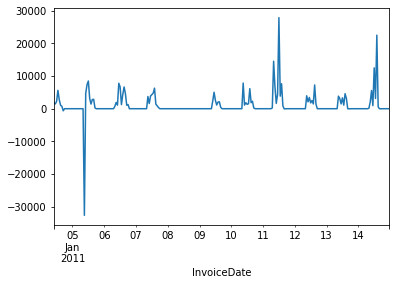

In [8]:
#
# make a quick visualizaiton of the first 2 weeks
#
retail_sales[retail_sales.index < pd.to_datetime('2011-01-15')].plot()